In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Upload e leitura do arquivo Excel

In [ ]:
# 📁 Carregar Dados
# =========================================
uploaded = files.upload()
df_original = pd.read_excel(next(iter(uploaded)))


Saving Data_Breach_Chronology_Kaplameyer.xlsx to Data_Breach_Chronology_Kaplameyer (2).xlsx


In [ ]:
# ===========================
# 3. Visão geral dos dados
# ===========================
print("📂 Dimensões do dataset (linhas, colunas):", df.shape)
print("\n📌 Tipos de dados por coluna:")
print(df.dtypes)

print("\n🔎 Primeiras 5 linhas do dataset:")
print(df.head())

# ===========================
# 4. Checar valores ausentes
# ===========================
print("\n❗ Valores ausentes por coluna:")
print(df.isnull().sum())

# ===========================
# 5. Estatísticas gerais
# ===========================
print("\n📊 Estatísticas descritivas para colunas numéricas:")
print(df.describe())

print("\n📊 Contagem de registros por tipo de organização:")
if 'organization_type' in df.columns:
    print(df['organization_type'].value_counts())

print("\n📊 Contagem de registros por tipo de violação:")
if 'breach_type' in df.columns:
    print(df['breach_type'].value_counts())

# ===========================
# 6. Salvar as estatísticas de contagem
# ===========================
df['organization_type'].value_counts().to_csv("contagem_por_organization_type.csv")
df['breach_type'].value_counts().to_csv("contagem_por_breach_type.csv")

print("\n✅ Arquivos de contagem salvos:")
print("- contagem_por_organization_type.csv")
print("- contagem_por_breach_type.csv")


📂 Dimensões do dataset (linhas, colunas): (72553, 3)

📌 Tipos de dados por coluna:
breach_date          object
organization_type    object
breach_type          object
dtype: object

🔎 Primeiras 5 linhas do dataset:
  breach_date organization_type breach_type
0  2020-09-05               BSR        HACK
1  2021-08-16              UNKN        UNKN
2  2021-03-15              UNKN        UNKN
3  2010-02-18               BSO        PORT
4  2020-09-10               MED        UNKN

❗ Valores ausentes por coluna:
breach_date          0
organization_type    0
breach_type          0
dtype: int64

📊 Estatísticas descritivas para colunas numéricas:
       breach_date organization_type breach_type
count        72553             72553       72553
unique        4716                 8           8
top           UNKN              UNKN        UNKN
freq         32411             22540       40038

📊 Contagem de registros por tipo de organização:
organization_type
UNKN    22540
MED     15294
BSF     14492


/tmp/ipython-input-791439282.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ano'] = df[col_data].dt.year
/tmp/ipython-input-791439282.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mes'] = df[col_data].dt.month
/tmp/ipython-input-791439282.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  incidentes_por_mes = df.set_index(col_data).resample('M').size()


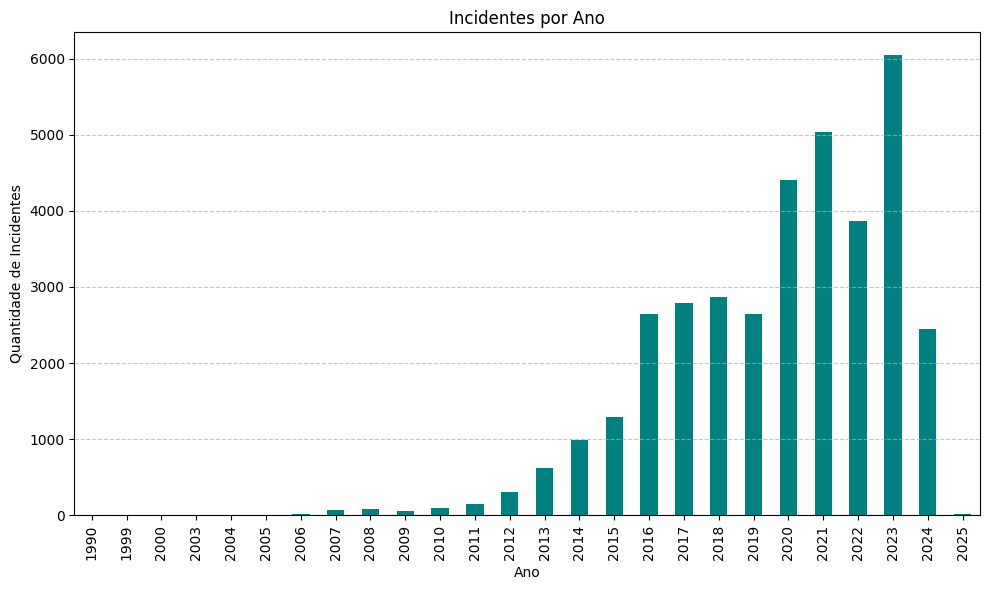

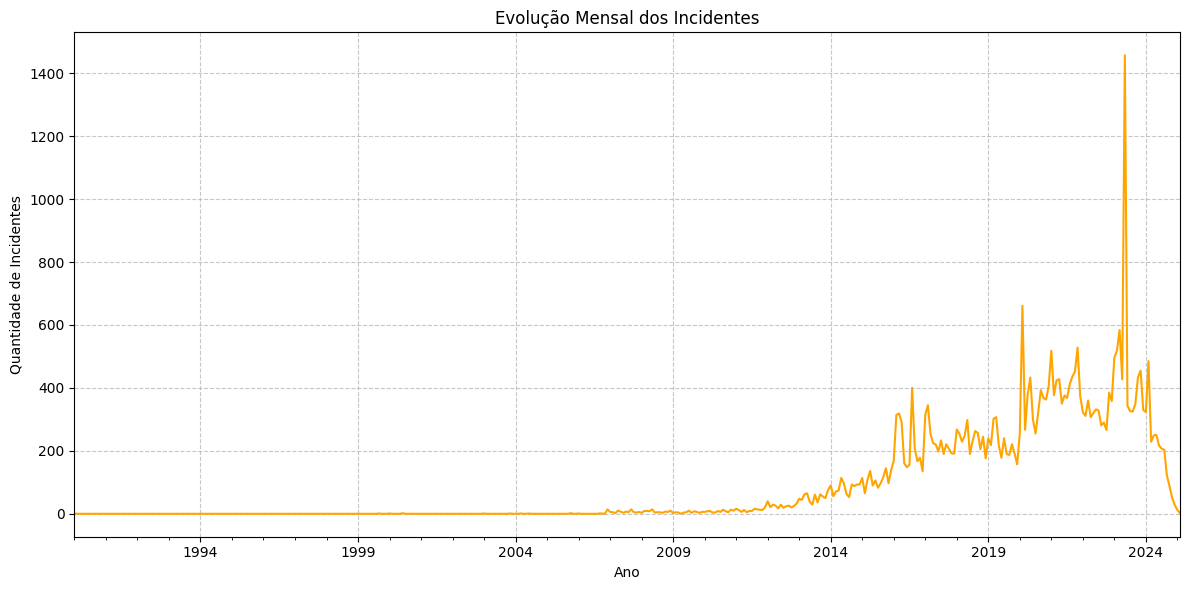

✅ Arquivos salvos: incidentes_por_ano.csv e incidentes_por_mes.csv


In [ ]:

# ===========================
# 2. Carregar a base
# ===========================
df = df_original

# ===========================
# 3. Preparar coluna de data
# ===========================
# Verifique o nome correto da coluna de datas no seu dataset.
# Vou supor que seja "Date Breach". Ajuste caso tenha outro nome.
col_data = 'breach_date'

# Converte para datetime, tratando erros
df[col_data] = pd.to_datetime(df[col_data], errors='coerce')

# Remove linhas sem data válida
df = df.dropna(subset=[col_data])

# ===========================
# 4. Criar colunas derivadas
# ===========================
df['Ano'] = df[col_data].dt.year
df['Mes'] = df[col_data].dt.month

# ===========================
# 5. Contagem de incidentes ao longo do tempo
# ===========================
# Incidentes por ano
incidentes_por_ano = df.groupby('Ano').size()

# Incidentes por mês e ano (mais granular)
incidentes_por_mes = df.set_index(col_data).resample('M').size()

# ===========================
# 6. Visualizações
# ===========================

# Gráfico 1: Incidentes por Ano
plt.figure(figsize=(10,6))
incidentes_por_ano.plot(kind='bar', color='teal')
plt.title('Incidentes por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Incidentes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico 2: Série temporal mensal
plt.figure(figsize=(12,6))
incidentes_por_mes.plot(kind='line', color='orange')
plt.title('Evolução Mensal dos Incidentes')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Incidentes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ===========================
# 7. Salvar resultados
# ===========================
incidentes_por_ano.to_csv("incidentes_por_ano.csv")
incidentes_por_mes.to_csv("incidentes_por_mes.csv")
print("✅ Arquivos salvos: incidentes_por_ano.csv e incidentes_por_mes.csv")


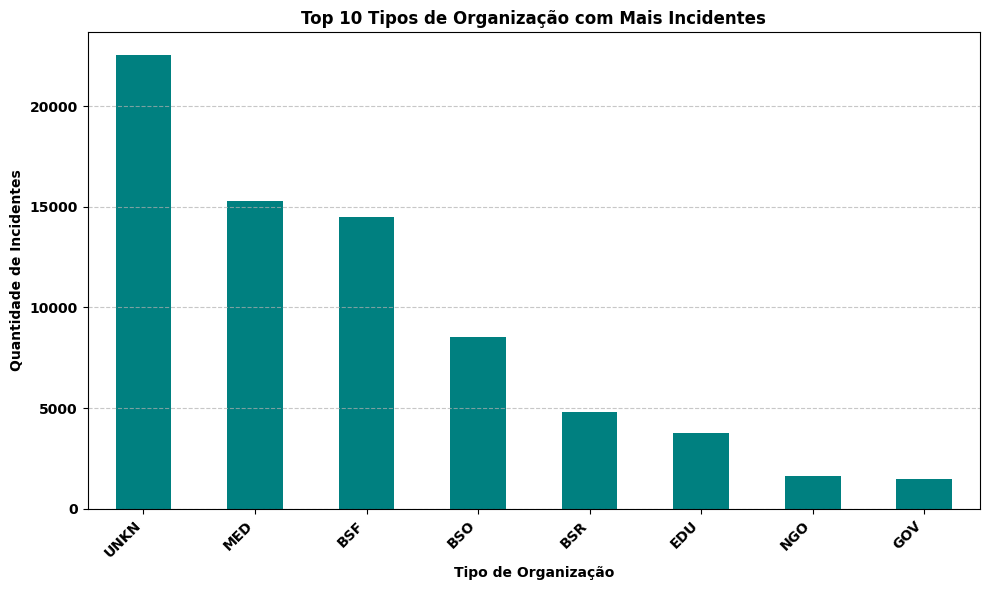

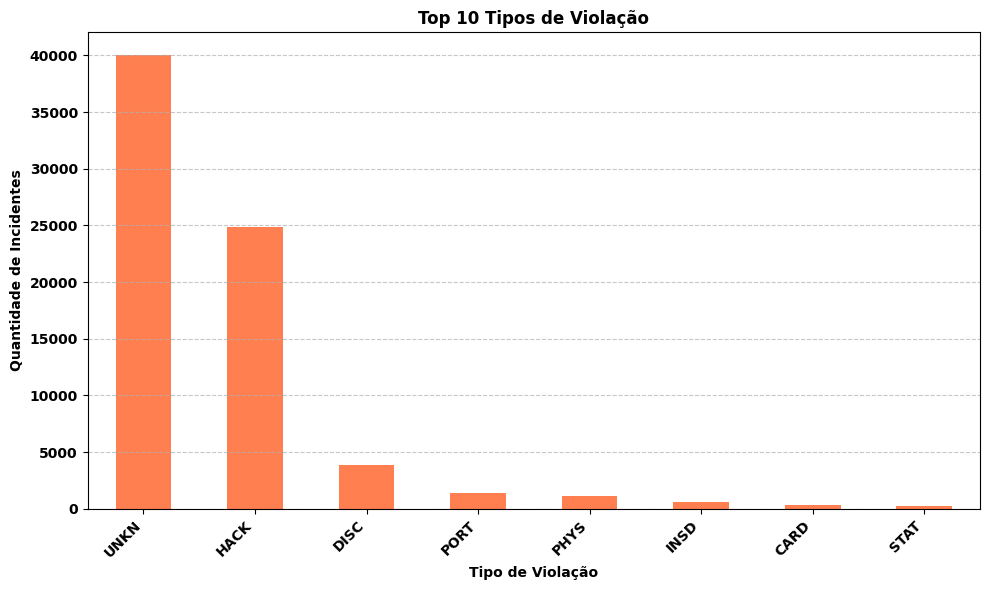

✅ Análises e gráficos gerados com sucesso!


In [50]:
# =========================================
# 1. Instalar e importar bibliotecas
# =========================================
!pip install seaborn openpyxl --quiet  # Instala seaborn e openpyxl

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # <-- Importa seaborn para usar o heatmap

# =========================================
# 2. Carregar a base
# =========================================
df = df_original

# =========================================
# 3. Conferir e limpar colunas
# =========================================
col_org = 'organization_type'
col_breach = 'breach_type'

# Remove linhas sem valores nessas colunas
df = df.dropna(subset=[col_org, col_breach])

# =========================================
# 4. Contagens
# =========================================
contagem_org = df[col_org].value_counts()
contagem_breach = df[col_breach].value_counts()
tabela_cruzada = pd.crosstab(df[col_org], df[col_breach])

# =========================================
# 5. Visualizações
# =========================================

# --- Gráfico 1: Top 10 tipos de organização ---
plt.figure(figsize=(10,6))
contagem_org.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Tipos de Organização com Mais Incidentes')
plt.xlabel('Tipo de Organização')
plt.ylabel('Quantidade de Incidentes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Gráfico 2: Top 10 tipos de violação ---
plt.figure(figsize=(10,6))
contagem_breach.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Tipos de Violação')
plt.xlabel('Tipo de Violação')
plt.ylabel('Quantidade de Incidentes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# =========================================
# 6. Salvar resultados
# =========================================
contagem_org.to_csv("contagem_por_organization.csv")
contagem_breach.to_csv("contagem_por_breach.csv")
tabela_cruzada.to_csv("tabela_cruzada_org_vs_breach.csv")

print("✅ Análises e gráficos gerados com sucesso!")


In [49]:
# Faz uma cópia do DataFrame original
df = df_original.copy()

# Função para ajustar datas incompletas
def ajustar_datas(data_str):
    try:
        if pd.isna(data_str):
            return pd.NaT
        data_str = str(data_str)
        if len(data_str) == 4:  # Somente ano (ex: '2005')
            return pd.Timestamp(data_str + '-01-01')
        elif len(data_str) == 7:  # Ano e mês (ex: '2005-09')
            return pd.Timestamp(data_str + '-01')
        else:  # Data completa (ex: '2005-09-22')
            return pd.Timestamp(data_str)
    except:
        return pd.NaT

# Aplica a função de ajuste à coluna de datas
df['breach_date'] = df['breach_date'].apply(ajustar_datas)

# Converte a coluna para o tipo datetime do Pandas
df['breach_date'] = pd.to_datetime(df['breach_date'], errors='coerce')

# Define a coluna de data como índice
df.set_index('breach_date', inplace=True)

# Filtra para manter apenas dados entre 2010 e 2023
df = df[(df.index >= '2010-01-01') & (df.index < '2024-01-01')]

# Extrai a série temporal mensal
serie = df.resample('M').size().fillna(0)



/tmp/ipython-input-3860770544.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df.resample('M').size().fillna(0)


In [ ]:
!pip install lifelines --quiet


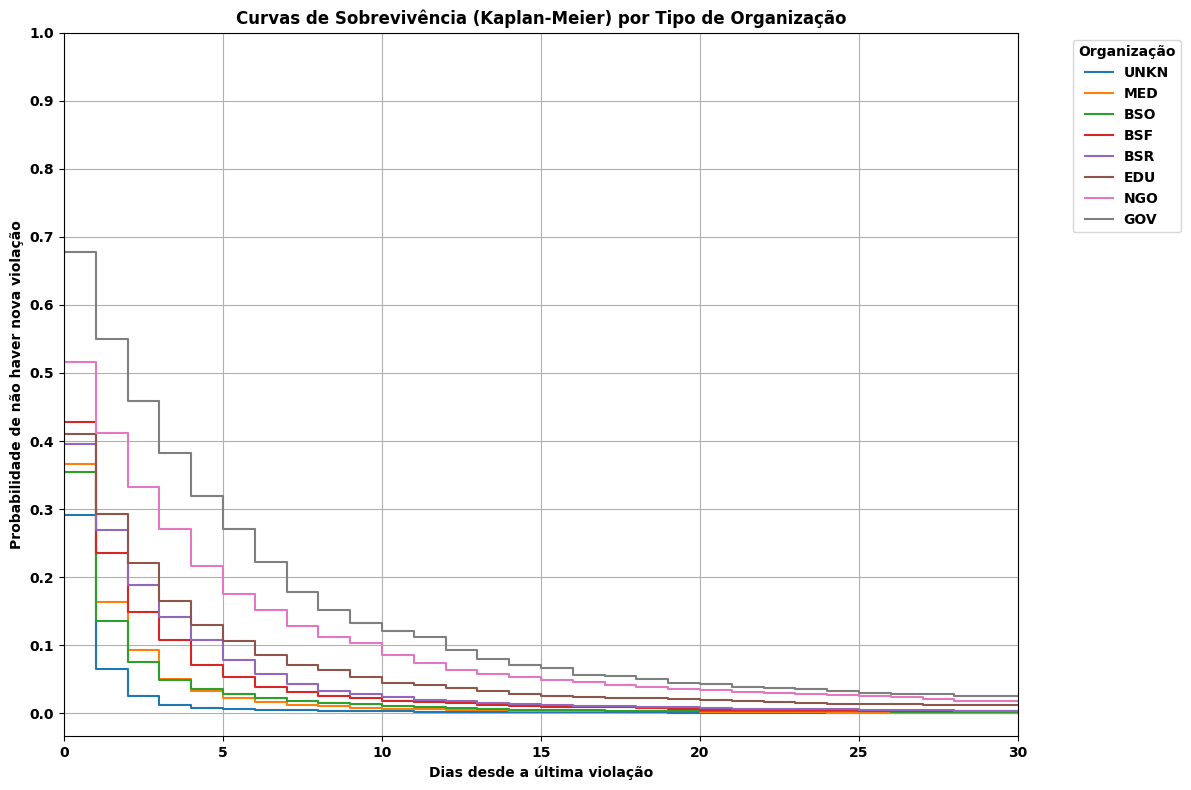

In [ ]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Contagem de incidentes por tipo de organização
incident_counts = df['organization_type'].value_counts()

# Manter apenas organizações com pelo menos 10 incidentes
orgs_to_keep = incident_counts[incident_counts >= 10].index.tolist()

plt.figure(figsize=(12, 8))

# Configurações de estilo
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

# Loop pelas organizações selecionadas
for org in orgs_to_keep:
    df_org = df[df['organization_type'] == org].sort_index()
    df_org['days_since_last'] = (df_org.index.to_series().diff().dt.days)
    df_org = df_org.dropna(subset=['days_since_last'])

    if len(df_org) < 2:
        continue

    T = df_org['days_since_last']
    E = [1] * len(df_org)

    kmf = KaplanMeierFitter()
    kmf.fit(T, event_observed=E, label=org)
    kmf.plot(ci_show=False)

# Ajustes do gráfico
plt.xlim(0, 30)  # <-- limite de 500 dias no eixo X
plt.xticks(range(0, 31, 5))  # ticks a cada 50 dias
plt.yticks([i / 10 for i in range(0, 11, 1)])

plt.xlabel('Dias desde a última violação')
plt.ylabel('Probabilidade de não haver nova violação')
plt.title('Curvas de Sobrevivência (Kaplan-Meier) por Tipo de Organização')
plt.legend(title='Organização', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
